In [2]:
import sys
import os

os.chdir("./..")

In [3]:
import pandas as pd
import data
import numpy as np
import matplotlib.pyplot as plt

# Let's characterize the clickouts made the same reference of the interaction before the actual clickout

### Some preprocessing first: let's get the train dataframe and lets keep just the sessions that have one clickout

In [4]:
df = data.train_df('full')

In [5]:
my_df = df.head(1000000)

In [6]:
my_df

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
5,00RL8Z82B2Z1,aff3928535f48,1541037532,6,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
6,00RL8Z82B2Z1,aff3928535f48,1541037532,7,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
7,00RL8Z82B2Z1,aff3928535f48,1541037532,8,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
8,00RL8Z82B2Z1,aff3928535f48,1541037542,9,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
9,00RL8Z82B2Z1,aff3928535f48,1541037542,10,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [7]:
def filter_more_at_least_one_clickout(x):
    y = x[x['action_type'] == 'clickout item']
    if len(y) >= 1:
        return x

In [8]:
session_with_ckout = my_df.groupby(['session_id'], as_index=False).apply(filter_more_at_least_one_clickout).reset_index()
session_with_ckout = session_with_ckout.drop(['level_0', 'level_1'], 1)

In [9]:
len(session_with_ckout)

895703

In [9]:
len(session_with_ckout.groupby(['user_id', 'session_id']))

51962

### Distribution of lengths of sessions with just one clickout

In [ ]:
df_lengths = session_with_ckout.groupby(['user_id', 'session_id']).apply(lambda x: pd.DataFrame({'length': [len(x)]}))
df_lengths.hist(bins=150, column='length', range=[0, 50], weights = np.ones(len(df_lengths))/len(df_lengths))

### Get the sessions with at least 1 clickout that have last reference equal to the clickout and the ones that dont (but still the last reference is an int)

In [10]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

In [11]:
def existsIndex(df, idx):
    try:
        df.loc[idx]
        return True
    except KeyError:
        return False

In [12]:
def get_clk_eq_last_ref(x):
    y = x[x['action_type'] == 'clickout item']
    idx = y.index[-1]
    row = x.loc[[idx]]
    ref = int(row['reference'])
    i = 1
    while True:
        if not existsIndex(x, idx - i):
            break
        row_before = x.loc[idx - i]
        if RepresentsInt(row_before['reference']):
            if int(row_before['reference']) == ref:
                # those are the sessions to be studied
                return pd.DataFrame({'length': [len(x)], 'type_prev_ref': [row_before['action_type']]})
            else:
                break
        else:
            break
            #i += 1

    # return pd.DataFrame()

In [13]:
def get_clk_diff_last_ref(x):
    y = x[x['action_type'] == 'clickout item']
    idx = y.index[-1]
    row = x.loc[[idx]]
    ref = int(row['reference'])
    i = 1
    while True:
        if not existsIndex(x, idx - i):
            break
        row_before = x.loc[idx - i]
        if RepresentsInt(row_before['reference']):
            if int(row_before['reference']) == ref:
                break
            else:
                # those are the sessions not to be studied
                return pd.DataFrame({'length': [len(x)], 'type_prev_ref': [row_before['action_type']]})
        else:
            break
            #i += 1

    # return pd.DataFrame()

In [14]:
clk_eq_last_ref = session_with_ckout.groupby(['user_id', 'session_id']).apply(get_clk_eq_last_ref)
clk_diff_last_ref = session_with_ckout.groupby(['user_id', 'session_id']).apply(get_clk_diff_last_ref)

In [15]:
clk_eq_last_ref

,,,length,type_prev_ref
user_id,session_id,,,
002BISXP1U1Q,8cd721ffb8e03,0,2,interaction item deals
002O8H8GYKSQ,ab252cd2bafd3,0,2,clickout item
003ZD97CWBYE,f833a387fa0c9,0,4,interaction item deals
004STL2FQU99,24ab1f448fa9c,0,13,interaction item info
006MM63UET1V,e5d37102d5f21,0,6,interaction item image
00941AJZU07K,a337682a6f448,0,19,clickout item
00A86US7B103,8c8cab541a53b,0,162,interaction item info
00FXTZ1X2KHW,cef1e94b198b0,0,18,interaction item image
00HM8AOZU1EV,6bfe3d44684a5,0,97,search for item


In [16]:
clk_diff_last_ref

,,,length,type_prev_ref
user_id,session_id,,,
0004IOZI7CKF,0146f7cb014ba,0,5,clickout item
002IXCPKK20W,dcdc75a82f142,0,2,search for item
006OQ8Q1YFFY,cbe7976eabb3f,0,6,clickout item
00C7567H3C76,ea8eabf02253d,0,5,clickout item
00CX1JA8LW0S,2281a4607607a,0,14,clickout item
00E8MKDYI6MC,79d78f9e2523e,0,37,clickout item
00FEK9OY1TSS,176f4c54419b6,0,3,clickout item
00FXSTAWAMR3,4de9138cb34dd,0,3,clickout item
00L5WFY73LPG,2f40be7e7c2d2,0,35,interaction item image


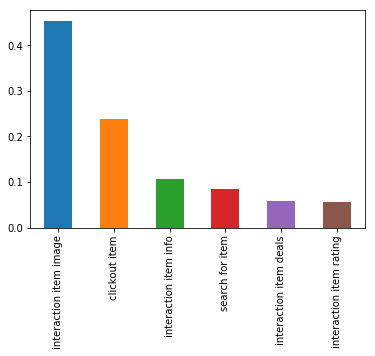

In [17]:
to_plot_eq = clk_eq_last_ref.type_prev_ref.value_counts()/len(clk_eq_last_ref)
to_plot_eq.plot.bar()

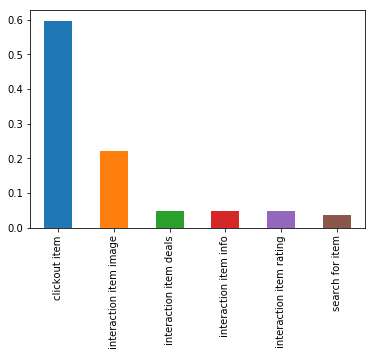

In [18]:
to_plot_diff = clk_diff_last_ref.type_prev_ref.value_counts()/len(clk_diff_last_ref)
to_plot_diff.plot.bar()

In [19]:
for i in to_plot_eq.index:
    val_eq = clk_eq_last_ref.type_prev_ref.value_counts().loc[i]
    val_diff = clk_diff_last_ref.type_prev_ref.value_counts().loc[i]
    print('index: {}. perc of equals: {} perc of diffs: {}'.format(i, val_eq/(val_eq+val_diff), val_diff/(val_eq+val_diff)))

index: interaction item image. perc of equals: 0.7374817251461988 perc of diffs: 0.2625182748538012
index: clickout item. perc of equals: 0.35394616218018166 perc of diffs: 0.6460538378198183
index: interaction item info. perc of equals: 0.7487098054783644 perc of diffs: 0.2512901945216356
index: search for item. perc of equals: 0.7608370702541106 perc of diffs: 0.23916292974588937
index: interaction item deals. perc of equals: 0.6224066390041494 perc of diffs: 0.3775933609958506
index: interaction item rating. perc of equals: 0.6202453987730061 perc of diffs: 0.37975460122699384


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31927f1588>]],
      dtype=object)

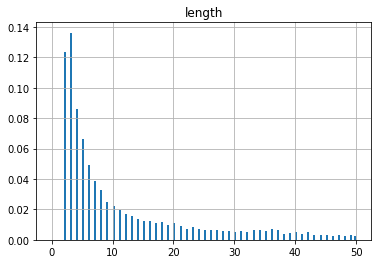

In [20]:
clk_eq_last_ref.hist(column='length', bins=150, range=[0, 50], weights = np.ones(len(clk_eq_last_ref))/len(clk_eq_last_ref))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31927f1c88>]],
      dtype=object)

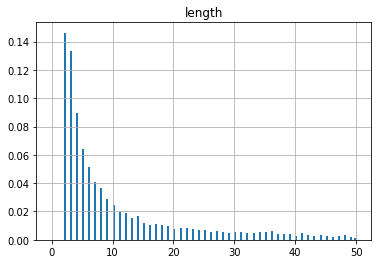

In [21]:
clk_diff_last_ref.hist(bins=150, column='length', range=[0, 50], weights = np.ones(len(clk_diff_last_ref))/len(clk_diff_last_ref))

### Get the sessions with at least 1 clickout that have not numeric previous reference but some numeric before

In [22]:
def get_clk_eq_last_ref1(x):
    y = x[x['action_type'] == 'clickout item']
    idx = y.index[-1]
    row = x.loc[[idx]]
    ref = int(row['reference'])
    i = 1
    while True:
        if not existsIndex(x, idx - i):
            break
        row_before = x.loc[idx - i]
        if RepresentsInt(row_before['reference']):
            if int(row_before['reference']) == ref:
                if i > 1:
                    return pd.DataFrame({'length': [len(x)], 'type_prev_ref': [row_before['action_type']]})
                else:
                    break
            else:
                break
        else:
            i += 1

In [23]:
def get_clk_diff_last_ref1(x):
    y = x[x['action_type'] == 'clickout item']
    idx = y.index[-1]
    row = x.loc[[idx]]
    ref = int(row['reference'])
    i = 1
    while True:
        if not existsIndex(x, idx - i):
            break
        row_before = x.loc[idx - i]
        if RepresentsInt(row_before['reference']):
            if int(row_before['reference']) == ref:
                break
            else:
                if i > 1:
                    return pd.DataFrame({'length': [len(x)], 'type_prev_ref': [row_before['action_type']]})
                else:
                    break
        else:
            i += 1

In [24]:
clk_eq_last_ref1 = session_with_ckout.groupby(['user_id', 'session_id']).apply(get_clk_eq_last_ref1)
clk_diff_last_ref1 = session_with_ckout.groupby(['user_id', 'session_id']).apply(get_clk_diff_last_ref1)

In [25]:
clk_eq_last_ref1

,,,length,type_prev_ref
user_id,session_id,,,
02PMWG2C1IN9,aa8955b39de95,0,14,clickout item
03LHVF3D3R0Q,ffc5bc71da0b4,0,5,interaction item info
046X5351B36M,a1643601b70d7,0,69,interaction item image
063Q8LRNJP9P,024ed5bfa7124,0,5,interaction item image
064N8VXS2Y95,3f869ba569a5c,0,8,interaction item image
0791D9OLX7BA,b49fc42d686f6,0,25,interaction item image
09FH71GL0GAJ,7bae78fe6f276,0,6,clickout item
0AF63GNPTDA7,16b444372bea4,0,8,clickout item
0B6WSFM8Q467,115af4cad933a,0,28,interaction item image


In [26]:
clk_diff_last_ref1

,,,length,type_prev_ref
user_id,session_id,,,
001OCXQ9PXET,362dc2be48010,0,4,clickout item
00MGGYKBGJRB,a44f0fa466da5,0,8,clickout item
00PEUY8NA3NT,f32f5a2b0aee0,0,8,clickout item
00RL8Z82B2Z1,aff3928535f48,0,16,clickout item
01A7BYZ0791M,ad10f280dfc9e,0,27,clickout item
02RJO53KK08L,704ff8bf7bfbd,0,12,clickout item
032SYQBOLOUZ,bc96e106aabbc,0,48,search for item
05184PWEET5L,fca28b50e8abe,0,35,clickout item
055CO8XXXIKF,cb57e23c9555f,0,5,search for item


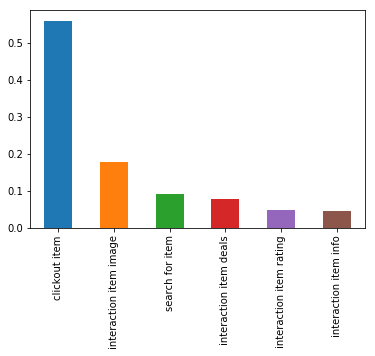

In [27]:
to_plot = clk_eq_last_ref1.type_prev_ref.value_counts()/len(clk_eq_last_ref1)
to_plot.plot.bar()

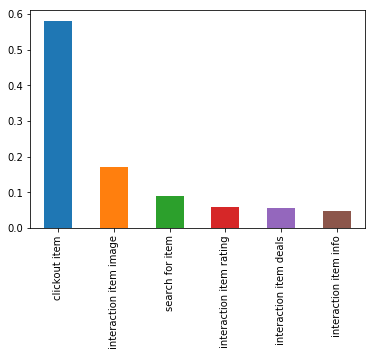

In [28]:
to_plot = clk_diff_last_ref1.type_prev_ref.value_counts()/len(clk_diff_last_ref1)
to_plot.plot.bar()